In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Resources/full_loan_cleaned.csv')

data

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_hi,purpose_house,purpose_mp,purpose_medi,purpose_moving,purpose_other,purpose_renewe,purpose_sb,purpose_vacat,purpose_wedding
0,30000,22.35,1151.16,5,100000.00,1,30.46,0,0,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40000,16.14,975.71,0,45000.00,1,50.53,0,0,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000,7.56,622.68,10,100000.00,1,18.92,0,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4500,11.31,147.99,10,38500.00,1,4.64,0,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8425,27.27,345.18,3,450000.00,1,12.37,0,0,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47002,27950,17.09,997.75,9,235000.00,1,25.50,0,1,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47003,30000,17.09,1070.93,6,88000.00,1,21.16,0,3,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47004,18000,14.08,615.90,0,44000.00,0,20.38,0,2,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47005,12000,12.62,270.71,10,89625.39,1,17.61,0,0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
x = data.drop(columns='loan_status')

y = data['loan_status']


In [25]:
x.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'term_36', 'term_60', 'home_ownership_any', 'home_ownership_mor',
       'home_ownership_own', 'home_ownership_rent', 'ver_stat_nv',
       'ver_stat_sv', 'ver_stat_v', 'purpose_car', 'purpose_cc', 'purpose_dc',
       'purpose_hi', 'purpose_house', 'purpose_mp', 'purpose_medi',
       'purpose_moving', 'purpose_other', 'purpose_renewe', 'purpose_sb',
       'purpose_vacat', 'purpose_wedding'],
      dtype='object')

In [18]:
scaler = StandardScaler()

scaler.fit(x)

StandardScaler()

In [19]:
scaler.mean_

array([1.49354341e+04, 1.34339581e+01, 4.45398867e+02, 6.30557151e+00,
       8.00162128e+04, 1.84587149e+01, 2.36475419e-01, 5.60235710e-01,
       1.14374455e+01, 1.58423214e-01, 1.43752890e+04, 3.92164954e+01,
       2.42020125e+01, 1.41702300e-01, 7.28870168e-01, 2.71129832e-01,
       3.19101410e-04, 5.07988172e-01, 1.34788436e-01, 3.56904291e-01,
       3.69498160e-01, 4.02131597e-01, 2.28370243e-01, 1.44021103e-02,
       1.99587296e-01, 5.08307273e-01, 8.10943051e-02, 1.82951475e-02,
       3.24207033e-02, 1.92311783e-02, 8.99865977e-03, 9.69855553e-02,
       6.38202821e-04, 1.04027060e-02, 9.59431574e-03, 4.25468547e-05])

In [20]:
scaler.var_

array([1.03321988e+08, 3.04823061e+01, 8.62436338e+04, 1.38650578e+01,
       6.01543169e+09, 3.67545007e+02, 5.69177766e-01, 6.46609922e-01,
       3.50726447e+01, 1.65703455e-01, 4.63432072e+08, 6.58574671e+02,
       1.63385447e+02, 1.25409428e-01, 1.97618446e-01, 1.97618446e-01,
       3.18999585e-04, 2.49936189e-01, 1.16620513e-01, 2.29523618e-01,
       2.32969270e-01, 2.40421776e-01, 1.76217275e-01, 1.41946895e-02,
       1.59752207e-01, 2.49930989e-01, 7.45180188e-02, 1.79604351e-02,
       3.13696013e-02, 1.88613401e-02, 8.91768390e-03, 8.75793574e-02,
       6.37795518e-04, 1.02944897e-02, 9.50226485e-03, 4.25450445e-05])

In [21]:
x_std = scaler.transform(x)

In [22]:
x_std.mean()

-2.579742596557756e-17

In [23]:
x_std.std()

0.9999999999999997

In [24]:
x_std

array([[ 1.48204109,  1.6149095 ,  2.40322379, ..., -0.10252834,
        -0.09842387, -0.00652293],
       [ 2.46583385,  0.49012923,  1.80578991, ..., -0.10252834,
        -0.09842387, -0.00652293],
       [ 0.49824833, -1.06391501,  0.60366917, ..., -0.10252834,
        -0.09842387, -0.00652293],
       ...,
       [ 0.30148978,  0.11701371,  0.58058224, ..., -0.10252834,
        -0.09842387, -0.00652293],
       [-0.28878588, -0.14742738, -0.59484211, ..., -0.10252834,
        -0.09842387, -0.00652293],
       [-0.09202733,  0.02826293,  0.10321401, ..., -0.10252834,
        -0.09842387, -0.00652293]])

In [37]:
x=pd.DataFrame(x_std,columns=[['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'term_36', 'term_60', 'home_ownership_any', 'home_ownership_mor',
       'home_ownership_own', 'home_ownership_rent', 'ver_stat_nv',
       'ver_stat_sv', 'ver_stat_v', 'purpose_car', 'purpose_cc', 'purpose_dc',
       'purpose_hi', 'purpose_house', 'purpose_mp', 'purpose_medi',
       'purpose_moving', 'purpose_other', 'purpose_renewe', 'purpose_sb',
       'purpose_vacat', 'purpose_wedding']])

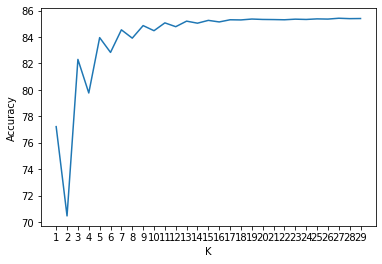

In [39]:
train_X,test_X,train_Y,test_Y = train_test_split(x,y,test_size=0.3)

k_range = range(1,30)
model_score = []

for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn,train_X,train_Y,cv=10,scoring='accuracy')
    model_score.append(scores.mean()*100)

plt.plot(k_range,model_score)
plt.xlabel('K')
plt.xticks(np.arange(1,30,step=1))
plt.ylabel('Accuracy')
plt.show()

In [32]:
knn2 = KNeighborsClassifier()

grid={'n_neighbors':range(1,30,1),"weights":['distance']}
gs=GridSearchCV(estimator=knn2,param_grid=grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=10)
gs.fit(train_X,train_Y)

print('max score:',gs.best_score_)
print('best params:',gs.best_params_)
print('best settings:',gs.best_estimator_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
max score: 0.8485898337712555
best params: {'n_neighbors': 28, 'weights': 'distance'}
best settings: KNeighborsClassifier(n_neighbors=28, weights='distance')


In [33]:
knn_best = gs.best_estimator_
pred_Y = knn_best.predict(test_X)
test_score = knn_best.score(test_X,test_Y)
matrix = confusion_matrix(test_Y,pred_Y)

print(test_score)
print(matrix)

0.8483301425228674
[[   33  2034]
 [  105 11931]]


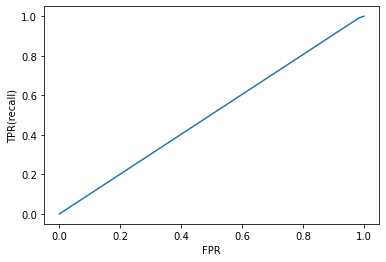

In [34]:
fprs,tprs,thresholds=roc_curve(test_Y,pred_Y)
plt.plot(fprs,tprs)
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')
plt.show()

In [35]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.24      0.02      0.03      2067
           1       0.85      0.99      0.92     12036

    accuracy                           0.85     14103
   macro avg       0.55      0.50      0.47     14103
weighted avg       0.76      0.85      0.79     14103



In [45]:
conda install python-graphviz

Solving environment: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: C:\Users\Matt\anaconda3\envs\PythonAdv

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.9.30  |       haa95532_1         116 KB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB
    ------------------------------------------------------------
                                           Total:        29.4 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.16-pyhd3eb1b0_1

The following packages will be UPDATED:

  ca-certificates                       2021.7.5-haa95532_1 --> 2021.9.30-haa95532_1




python-graphviz-0.16 | 20 KB     |            |   0% 
python-graphviz-0.16 | 20 K

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [53]:
x1 = data.drop(columns='loan_status')

y1 = data['loan_status']

train_X,test_X,train_Y,test_Y = train_test_split(x1,y1,test_size=0.3,random_state=41)

clf = DecisionTreeClassifier()



grid1={'criterion':['entropy','gini'],'splitter':['random','best'],'max_depth':range(3,8)
       ,'min_samples_leaf':range(1,10),'min_samples_split':range(1,10),
      'class_weight':['balanced']}
gs1=GridSearchCV(estimator=clf,param_grid=grid1,cv=5,verbose=10)
gs1.fit(train_X,train_Y)

gs1.best_score_

# treeplot = tree.export_graphviz(gs1
#                                ,feature_names = x1.columns
#                                ,class_names=['yes','no']
#                                ,filled=True
#                                ,rounded=True)

# graph = graphviz.Source(treeplot)
# print(score)
# graph

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
[CV 1/5; 1/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 1/5; 1/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 1/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 2/5; 1/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 1/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 3/5; 1/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 1/1620] START class_weight=ba

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 2/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 3/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 1/5; 3/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.664 total time=   0.0s
[CV 2/5; 3/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 2/5; 3/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.687 total time=   0.0s
[CV 3/5; 3/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 3/5; 3/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_s

[CV 3/5; 8/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 8/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 4/5; 8/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 8/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 5/5; 8/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 9/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 1/5; 9/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples

[CV 1/5; 14/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 14/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 2/5; 14/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 14/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 3/5; 14/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 14/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 4/5; 14/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=1, min_sa

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 5/5; 20/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 21/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 21/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.590 total time=   0.0s
[CV 2/5; 21/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 2/5; 21/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.651 total time=   0.0s
[CV 3/5; 21/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 21/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=

[CV 3/5; 26/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 26/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 4/5; 26/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 26/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 5/5; 26/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 27/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 27/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_

[CV 3/5; 32/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 32/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 4/5; 32/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 32/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 5/5; 32/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 33/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=8, splitter=random
[CV 1/5; 33/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=2, min_

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 2/5; 38/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 38/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 3/5; 38/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 38/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 4/5; 38/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5; 38/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 5/5; 38/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_

[CV 3/5; 44/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 3/5; 44/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 44/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 4/5; 44/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 44/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 5/5; 44/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 45/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_

[CV 1/5; 50/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 1/5; 50/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 50/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 2/5; 50/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 50/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 3/5; 50/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 50/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=3, min_

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 3/5; 55/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 55/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 4/5; 55/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 55/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 5/5; 55/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 56/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 1/5; 56/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, mi

[CV 2/5; 61/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.659 total time=   0.0s
[CV 3/5; 61/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 3/5; 61/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.643 total time=   0.0s
[CV 4/5; 61/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 4/5; 61/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.409 total time=   0.0s
[CV 5/5; 61/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 5/5; 61/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_le

[CV 4/5; 67/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random
[CV 4/5; 67/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.690 total time=   0.0s
[CV 5/5; 67/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random
[CV 5/5; 67/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.546 total time=   0.0s
[CV 1/5; 68/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 1/5; 68/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 68/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 5/5; 74/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 75/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 1/5; 75/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.571 total time=   0.0s
[CV 2/5; 75/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 2/5; 75/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5; 75/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 3/5; 75/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=

[CV 5/5; 80/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 81/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random
[CV 1/5; 81/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.652 total time=   0.0s
[CV 2/5; 81/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random
[CV 2/5; 81/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.562 total time=   0.0s
[CV 3/5; 81/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random
[CV 3/5; 81/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf

[CV 4/5; 86/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 86/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 5/5; 86/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 87/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=8, splitter=random
[CV 1/5; 87/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.694 total time=   0.0s
[CV 2/5; 87/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=8, splitter=random
[CV 2/5; 87/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=5, 

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 92/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 92/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 2/5; 92/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 92/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 3/5; 92/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 92/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 4/5; 92/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples

[CV 4/5; 97/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 4/5; 97/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.448 total time=   0.0s
[CV 5/5; 97/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 5/5; 97/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.485 total time=   0.0s
[CV 1/5; 98/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 1/5; 98/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 98/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf

[CV 2/5; 103/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.626 total time=   0.0s
[CV 3/5; 103/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 3/5; 103/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.646 total time=   0.0s
[CV 4/5; 103/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 4/5; 103/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.652 total time=   0.0s
[CV 5/5; 103/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 5/5; 103/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_sam

[CV 5/5; 108/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 109/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 1/5; 109/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 109/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 2/5; 109/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 109/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 3/5; 109/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_l

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 110/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 111/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 1/5; 111/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.668 total time=   0.0s
[CV 2/5; 111/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 2/5; 111/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.641 total time=   0.0s
[CV 3/5; 111/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 3/5; 111/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples

[CV 4/5; 116/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 116/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 5/5; 116/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 117/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 1/5; 117/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.583 total time=   0.0s
[CV 2/5; 117/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 2/5; 117/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_l

[CV 2/5; 122/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 122/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 3/5; 122/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 122/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 4/5; 122/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 122/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 5/5; 122/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=7,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 128/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 129/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 1/5; 129/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.617 total time=   0.0s
[CV 2/5; 129/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 2/5; 129/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.486 total time=   0.0s
[CV 3/5; 129/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 3/5; 129/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples

[CV 3/5; 134/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 3/5; 134/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 134/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 4/5; 134/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 134/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 5/5; 134/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 135/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=

[CV 1/5; 140/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 140/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 2/5; 140/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 140/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 3/5; 140/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 140/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 4/5; 140/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=8,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 146/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 146/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 2/5; 146/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 146/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 3/5; 146/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 146/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 4/5; 146/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_

[CV 1/5; 152/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 152/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 2/5; 152/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 152/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 3/5; 152/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 152/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 4/5; 152/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9,

[CV 4/5; 157/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.589 total time=   0.0s
[CV 5/5; 157/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=random
[CV 5/5; 157/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.435 total time=   0.0s
[CV 1/5; 158/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 1/5; 158/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.541 total time=   0.0s
[CV 2/5; 158/1620] START class_weight=balanced, criterion=entropy, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 2/5; 158/1620] END class_weight=balanced, criterion=entropy, max_depth=3, min_samples_l

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 2/5; 164/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 164/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 3/5; 164/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 164/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 4/5; 164/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5; 164/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 5/5; 164/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_s

[CV 5/5; 169/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 1/5; 170/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 1/5; 170/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 170/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 2/5; 170/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 170/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 3/5; 170/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=

[CV 5/5; 175/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.644 total time=   0.0s
[CV 1/5; 176/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 1/5; 176/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 176/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 2/5; 176/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 176/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 3/5; 176/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 182/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 182/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 2/5; 182/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 182/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 3/5; 182/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 182/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 4/5; 182/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_s

[CV 1/5; 188/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 188/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 2/5; 188/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 188/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 3/5; 188/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 188/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 4/5; 188/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2,

[CV 2/5; 194/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 194/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 3/5; 194/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 194/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 4/5; 194/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 194/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 5/5; 194/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=2,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 201/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.523 total time=   0.0s
[CV 2/5; 201/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 2/5; 201/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 3/5; 201/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 3/5; 201/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.535 total time=   0.0s
[CV 4/5; 201/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 4/5; 201/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_sam

[CV 4/5; 206/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 4/5; 206/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 206/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 5/5; 206/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.593 total time=   0.0s
[CV 1/5; 207/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 1/5; 207/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.541 total time=   0.0s
[CV 2/5; 207/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_l

[CV 2/5; 212/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 212/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 3/5; 212/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 212/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 4/5; 212/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 212/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 5/5; 212/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=3,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 217/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 218/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 1/5; 218/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 218/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 2/5; 218/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 218/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 3/5; 218/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min

[CV 1/5; 224/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 224/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 2/5; 224/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 224/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 3/5; 224/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 224/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 4/5; 224/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4,

[CV 2/5; 230/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 230/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 3/5; 230/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 230/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 4/5; 230/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 230/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 5/5; 230/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=4,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 235/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 236/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 1/5; 236/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 236/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 2/5; 236/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 236/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 3/5; 236/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min

[CV 1/5; 242/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 242/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 2/5; 242/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 242/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 3/5; 242/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 242/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 4/5; 242/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5,

[CV 1/5; 248/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 248/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 2/5; 248/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 248/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 3/5; 248/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 248/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 4/5; 248/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=5,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 253/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 253/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 2/5; 253/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 253/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 3/5; 253/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 253/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 4/5; 253/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_l

[CV 5/5; 258/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=3, splitter=best;, score=0.593 total time=   0.0s
[CV 1/5; 259/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 1/5; 259/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 2/5; 259/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 2/5; 259/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.606 total time=   0.0s
[CV 3/5; 259/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 3/5; 259/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_sampl

[CV 3/5; 264/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 264/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=best
[CV 4/5; 264/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 264/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=best
[CV 5/5; 264/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.593 total time=   0.0s
[CV 1/5; 265/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 1/5; 265/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=

[CV 2/5; 270/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 270/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=9, splitter=best
[CV 3/5; 270/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 270/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=9, splitter=best
[CV 4/5; 270/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 270/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6, min_samples_split=9, splitter=best
[CV 5/5; 270/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=6,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 273/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.561 total time=   0.0s
[CV 2/5; 273/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 2/5; 273/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.631 total time=   0.0s
[CV 3/5; 273/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 3/5; 273/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.599 total time=   0.0s
[CV 4/5; 273/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 4/5; 273/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_sam

[CV 1/5; 279/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.585 total time=   0.0s
[CV 2/5; 279/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 2/5; 279/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.533 total time=   0.0s
[CV 3/5; 279/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 3/5; 279/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.647 total time=   0.0s
[CV 4/5; 279/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 4/5; 279/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_sam

[CV 1/5; 285/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=8, splitter=random
[CV 1/5; 285/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=8, splitter=random;, score=0.525 total time=   0.0s
[CV 2/5; 285/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=8, splitter=random
[CV 2/5; 285/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=8, splitter=random;, score=0.659 total time=   0.0s
[CV 3/5; 285/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=8, splitter=random
[CV 3/5; 285/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=7, min_samples_split=8, splitter=random;, score=0.635 total time=   0.0s
[CV 4/5; 285/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 289/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 290/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 1/5; 290/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 290/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 2/5; 290/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 290/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 3/5; 290/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min

[CV 4/5; 295/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.610 total time=   0.0s
[CV 5/5; 295/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 5/5; 295/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5; 296/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 1/5; 296/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 296/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 2/5; 296/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_l

[CV 3/5; 301/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5; 301/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 4/5; 301/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.610 total time=   0.0s
[CV 5/5; 301/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 5/5; 301/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.522 total time=   0.0s
[CV 1/5; 302/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 1/5; 302/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_sampl

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 307/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 308/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 1/5; 308/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 308/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 2/5; 308/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 308/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 3/5; 308/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min

[CV 1/5; 314/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 314/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 2/5; 314/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 314/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 3/5; 314/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 314/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 4/5; 314/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9,

[CV 1/5; 320/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.646 total time=   0.0s
[CV 2/5; 320/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 2/5; 320/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 3/5; 320/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 3/5; 320/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.632 total time=   0.0s
[CV 4/5; 320/1620] START class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 4/5; 320/1620] END class_weight=balanced, criterion=entropy, max_depth=4, min_samples_leaf=9,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 325/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 325/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 2/5; 325/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 325/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 3/5; 325/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 325/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 4/5; 325/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_l

[CV 5/5; 330/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 331/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random
[CV 1/5; 331/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.626 total time=   0.0s
[CV 2/5; 331/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random
[CV 2/5; 331/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.575 total time=   0.0s
[CV 3/5; 331/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=random
[CV 3/5; 331/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

[CV 4/5; 336/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.628 total time=   0.0s
[CV 5/5; 336/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, splitter=best
[CV 5/5; 336/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 337/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=random
[CV 1/5; 337/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.595 total time=   0.0s
[CV 2/5; 337/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=random
[CV 2/5; 337/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_l

[CV 3/5; 342/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.658 total time=   0.0s
[CV 4/5; 342/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=9, splitter=best
[CV 4/5; 342/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.628 total time=   0.0s
[CV 5/5; 342/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=9, splitter=best
[CV 5/5; 342/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 343/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=1, splitter=random
[CV 1/5; 343/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 345/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.603 total time=   0.0s
[CV 2/5; 345/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 2/5; 345/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 3/5; 345/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 345/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.595 total time=   0.0s
[CV 4/5; 345/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 4/5; 345/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sam

[CV 5/5; 350/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 351/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 351/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.685 total time=   0.0s
[CV 2/5; 351/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 2/5; 351/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.590 total time=   0.0s
[CV 3/5; 351/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 3/5; 351/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

[CV 4/5; 356/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 5/5; 356/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 5/5; 356/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 357/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, splitter=random
[CV 1/5; 357/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.629 total time=   0.0s
[CV 2/5; 357/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=8, splitter=random
[CV 2/5; 357/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_l

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 4/5; 361/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 361/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 5/5; 361/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 362/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 1/5; 362/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 362/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 2/5; 362/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3

[CV 3/5; 367/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.629 total time=   0.0s
[CV 4/5; 367/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 4/5; 367/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.694 total time=   0.0s
[CV 5/5; 367/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 5/5; 367/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.624 total time=   0.0s
[CV 1/5; 368/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 1/5; 368/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

[CV 2/5; 373/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.596 total time=   0.0s
[CV 3/5; 373/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 3/5; 373/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.606 total time=   0.0s
[CV 4/5; 373/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 4/5; 373/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.625 total time=   0.0s
[CV 5/5; 373/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 5/5; 373/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 379/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 380/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 1/5; 380/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 380/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 2/5; 380/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 380/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 3/5; 380/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min

[CV 3/5; 385/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.666 total time=   0.0s
[CV 4/5; 385/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 4/5; 385/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.597 total time=   0.0s
[CV 5/5; 385/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 5/5; 385/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 1/5; 386/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 1/5; 386/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

[CV 5/5; 391/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.633 total time=   0.0s
[CV 1/5; 392/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 1/5; 392/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5; 392/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 2/5; 392/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.661 total time=   0.0s
[CV 3/5; 392/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 3/5; 392/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 397/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 397/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=random
[CV 5/5; 397/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 398/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 1/5; 398/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 398/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 2/5; 398/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5,

[CV 2/5; 403/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.610 total time=   0.0s
[CV 3/5; 403/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random
[CV 3/5; 403/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.601 total time=   0.0s
[CV 4/5; 403/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random
[CV 4/5; 403/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.601 total time=   0.0s
[CV 5/5; 403/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=random
[CV 5/5; 403/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sam

[CV 3/5; 409/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.669 total time=   0.0s
[CV 4/5; 409/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random
[CV 4/5; 409/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.616 total time=   0.0s
[CV 5/5; 409/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random
[CV 5/5; 409/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.649 total time=   0.0s
[CV 1/5; 410/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 1/5; 410/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 415/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 416/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 1/5; 416/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 416/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 2/5; 416/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 416/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 3/5; 416/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min

[CV 3/5; 421/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.652 total time=   0.0s
[CV 4/5; 421/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 4/5; 421/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.671 total time=   0.0s
[CV 5/5; 421/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 5/5; 421/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.591 total time=   0.0s
[CV 1/5; 422/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 1/5; 422/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

[CV 2/5; 427/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.617 total time=   0.0s
[CV 3/5; 427/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 3/5; 427/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.707 total time=   0.0s
[CV 4/5; 427/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 4/5; 427/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.598 total time=   0.0s
[CV 5/5; 427/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 5/5; 427/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sam

[CV 5/5; 432/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 433/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 1/5; 433/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 433/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 2/5; 433/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 433/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 3/5; 433/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_l

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 435/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.636 total time=   0.0s
[CV 2/5; 435/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 2/5; 435/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.622 total time=   0.0s
[CV 3/5; 435/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 3/5; 435/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.599 total time=   0.0s
[CV 4/5; 435/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 4/5; 435/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sam

[CV 5/5; 440/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 441/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 1/5; 441/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.557 total time=   0.0s
[CV 2/5; 441/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 2/5; 441/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.655 total time=   0.0s
[CV 3/5; 441/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 3/5; 441/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

[CV 3/5; 446/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.658 total time=   0.0s
[CV 4/5; 446/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 4/5; 446/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.629 total time=   0.0s
[CV 5/5; 446/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 5/5; 446/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.607 total time=   0.0s
[CV 1/5; 447/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=7, min_samples_split=8, splitter=random
[CV 1/5; 447/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 5/5; 451/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 452/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 1/5; 452/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 452/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 2/5; 452/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 452/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 3/5; 452/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, mi

[CV 3/5; 457/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 4/5; 457/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 4/5; 457/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.654 total time=   0.0s
[CV 5/5; 457/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 5/5; 457/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.667 total time=   0.0s
[CV 1/5; 458/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 1/5; 458/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_sampl

[CV 3/5; 463/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 3/5; 463/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.552 total time=   0.0s
[CV 4/5; 463/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 4/5; 463/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.571 total time=   0.0s
[CV 5/5; 463/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 5/5; 463/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.610 total time=   0.0s
[CV 1/5; 464/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 469/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 470/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 1/5; 470/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 470/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 2/5; 470/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 470/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 3/5; 470/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min

[CV 1/5; 476/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5; 476/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 2/5; 476/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.661 total time=   0.0s
[CV 3/5; 476/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 3/5; 476/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.658 total time=   0.0s
[CV 4/5; 476/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 4/5; 476/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9,

[CV 5/5; 481/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.581 total time=   0.0s
[CV 1/5; 482/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 1/5; 482/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.608 total time=   0.0s
[CV 2/5; 482/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 2/5; 482/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.661 total time=   0.0s
[CV 3/5; 482/1620] START class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 3/5; 482/1620] END class_weight=balanced, criterion=entropy, max_depth=5, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 487/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 488/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 1/5; 488/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 488/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 2/5; 488/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 488/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 3/5; 488/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min

[CV 1/5; 494/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 494/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 2/5; 494/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.621 total time=   0.0s
[CV 3/5; 494/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 3/5; 494/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.674 total time=   0.0s
[CV 4/5; 494/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 4/5; 494/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1,

[CV 5/5; 499/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.667 total time=   0.0s
[CV 1/5; 500/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 1/5; 500/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 500/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 2/5; 500/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.621 total time=   0.0s
[CV 3/5; 500/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 3/5; 500/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 3/5; 505/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 505/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=random
[CV 4/5; 505/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 505/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=random
[CV 5/5; 505/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 506/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 1/5; 506/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_le

[CV 2/5; 511/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.662 total time=   0.0s
[CV 3/5; 511/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=random
[CV 3/5; 511/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.605 total time=   0.0s
[CV 4/5; 511/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=random
[CV 4/5; 511/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.615 total time=   0.0s
[CV 5/5; 511/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=random
[CV 5/5; 511/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sam

[CV 5/5; 516/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.646 total time=   0.0s
[CV 1/5; 517/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=random
[CV 1/5; 517/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.631 total time=   0.0s
[CV 2/5; 517/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=random
[CV 2/5; 517/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.611 total time=   0.0s
[CV 3/5; 517/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=random
[CV 3/5; 517/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sampl

[CV 3/5; 522/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.674 total time=   0.0s
[CV 4/5; 522/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, splitter=best
[CV 4/5; 522/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.638 total time=   0.0s
[CV 5/5; 522/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, splitter=best
[CV 5/5; 522/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.646 total time=   0.0s
[CV 1/5; 523/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 1/5; 523/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 525/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.633 total time=   0.0s
[CV 2/5; 525/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 2/5; 525/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.597 total time=   0.0s
[CV 3/5; 525/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 3/5; 525/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.653 total time=   0.0s
[CV 4/5; 525/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 4/5; 525/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sam

[CV 4/5; 530/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.638 total time=   0.0s
[CV 5/5; 530/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 5/5; 530/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.646 total time=   0.0s
[CV 1/5; 531/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 1/5; 531/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.647 total time=   0.0s
[CV 2/5; 531/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 2/5; 531/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_l

[CV 2/5; 536/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.621 total time=   0.0s
[CV 3/5; 536/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 3/5; 536/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.674 total time=   0.0s
[CV 4/5; 536/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 4/5; 536/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.638 total time=   0.0s
[CV 5/5; 536/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 5/5; 536/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=3,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 541/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 541/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 5/5; 541/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 542/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 1/5; 542/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 542/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 2/5; 542/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4,

[CV 2/5; 547/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.582 total time=   0.0s
[CV 3/5; 547/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 3/5; 547/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.633 total time=   0.0s
[CV 4/5; 547/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 4/5; 547/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.654 total time=   0.0s
[CV 5/5; 547/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 5/5; 547/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sam

[CV 5/5; 552/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.646 total time=   0.0s
[CV 1/5; 553/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=random
[CV 1/5; 553/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.610 total time=   0.0s
[CV 2/5; 553/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=random
[CV 2/5; 553/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.623 total time=   0.0s
[CV 3/5; 553/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=random
[CV 3/5; 553/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sampl

[CV 4/5; 558/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.638 total time=   0.0s
[CV 5/5; 558/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=9, splitter=best
[CV 5/5; 558/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.646 total time=   0.0s
[CV 1/5; 559/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=random
[CV 1/5; 559/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 559/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=random
[CV 2/5; 559/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_lea

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 4/5; 559/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 559/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=random
[CV 5/5; 559/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 560/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 1/5; 560/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 560/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 2/5; 560/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5

[CV 5/5; 565/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.610 total time=   0.0s
[CV 1/5; 566/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 1/5; 566/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 566/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 2/5; 566/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.621 total time=   0.0s
[CV 3/5; 566/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 3/5; 566/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=

[CV 5/5; 571/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.645 total time=   0.0s
[CV 1/5; 572/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 1/5; 572/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 572/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 2/5; 572/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.621 total time=   0.0s
[CV 3/5; 572/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 3/5; 572/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 4/5; 577/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 577/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 5/5; 577/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 578/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 1/5; 578/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 578/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 2/5; 578/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6

[CV 2/5; 583/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.607 total time=   0.0s
[CV 3/5; 583/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 3/5; 583/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.584 total time=   0.0s
[CV 4/5; 583/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 4/5; 583/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.587 total time=   0.0s
[CV 5/5; 583/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 5/5; 583/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sam

[CV 5/5; 588/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 589/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 1/5; 589/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.594 total time=   0.0s
[CV 2/5; 589/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 2/5; 589/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.586 total time=   0.0s
[CV 3/5; 589/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 3/5; 589/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sampl

[CV 4/5; 594/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.638 total time=   0.0s
[CV 5/5; 594/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best
[CV 5/5; 594/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 595/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 1/5; 595/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 595/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 2/5; 595/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_lea

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 4/5; 595/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 595/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 5/5; 595/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 596/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 1/5; 596/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 596/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 2/5; 596/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7

[CV 2/5; 601/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.641 total time=   0.0s
[CV 3/5; 601/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random
[CV 3/5; 601/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.647 total time=   0.0s
[CV 4/5; 601/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random
[CV 4/5; 601/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.662 total time=   0.0s
[CV 5/5; 601/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random
[CV 5/5; 601/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sam

[CV 5/5; 606/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 607/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 1/5; 607/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.623 total time=   0.0s
[CV 2/5; 607/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 2/5; 607/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.659 total time=   0.0s
[CV 3/5; 607/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 3/5; 607/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sampl

[CV 4/5; 612/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=best;, score=0.638 total time=   0.0s
[CV 5/5; 612/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=best
[CV 5/5; 612/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=7, min_samples_split=9, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 613/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 1/5; 613/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 613/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 2/5; 613/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_lea

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 613/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 613/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 5/5; 613/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 614/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 1/5; 614/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 614/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 2/5; 614/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8,

[CV 2/5; 619/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.626 total time=   0.0s
[CV 3/5; 619/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 3/5; 619/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.577 total time=   0.0s
[CV 4/5; 619/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 4/5; 619/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.632 total time=   0.0s
[CV 5/5; 619/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 5/5; 619/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sam

[CV 5/5; 624/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 625/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 1/5; 625/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.642 total time=   0.0s
[CV 2/5; 625/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 2/5; 625/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.619 total time=   0.0s
[CV 3/5; 625/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 3/5; 625/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sampl

[CV 4/5; 630/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.638 total time=   0.0s
[CV 5/5; 630/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=9, splitter=best
[CV 5/5; 630/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 631/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random
[CV 1/5; 631/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 631/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random
[CV 2/5; 631/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_lea

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 631/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 631/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random
[CV 5/5; 631/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 632/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 1/5; 632/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 632/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 2/5; 632/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9,

[CV 2/5; 637/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.652 total time=   0.0s
[CV 3/5; 637/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random
[CV 3/5; 637/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.641 total time=   0.0s
[CV 4/5; 637/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random
[CV 4/5; 637/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.596 total time=   0.0s
[CV 5/5; 637/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random
[CV 5/5; 637/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sam

[CV 5/5; 642/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=6, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 643/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random
[CV 1/5; 643/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.661 total time=   0.0s
[CV 2/5; 643/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random
[CV 2/5; 643/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.650 total time=   0.0s
[CV 3/5; 643/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random
[CV 3/5; 643/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_sampl

[CV 4/5; 648/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=9, splitter=best;, score=0.637 total time=   0.0s
[CV 5/5; 648/1620] START class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=9, splitter=best
[CV 5/5; 648/1620] END class_weight=balanced, criterion=entropy, max_depth=6, min_samples_leaf=9, min_samples_split=9, splitter=best;, score=0.645 total time=   0.0s
[CV 1/5; 649/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 1/5; 649/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 649/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 2/5; 649/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_lea

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 649/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 649/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 5/5; 649/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 650/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 1/5; 650/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 650/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 2/5; 650/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1,

[CV 5/5; 655/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.647 total time=   0.0s
[CV 1/5; 656/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 1/5; 656/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.597 total time=   0.1s
[CV 2/5; 656/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 2/5; 656/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.605 total time=   0.1s
[CV 3/5; 656/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 3/5; 656/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=

[CV 5/5; 661/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.626 total time=   0.0s
[CV 1/5; 662/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 1/5; 662/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.597 total time=   0.1s
[CV 2/5; 662/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 2/5; 662/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.605 total time=   0.1s
[CV 3/5; 662/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 3/5; 662/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 668/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 669/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 669/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.635 total time=   0.0s
[CV 2/5; 669/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 2/5; 669/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.637 total time=   0.0s
[CV 3/5; 669/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 669/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples

[CV 3/5; 674/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.670 total time=   0.1s
[CV 4/5; 674/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 4/5; 674/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.594 total time=   0.1s
[CV 5/5; 674/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 5/5; 674/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 675/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 675/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=

[CV 2/5; 680/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.604 total time=   0.1s
[CV 3/5; 680/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 3/5; 680/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.671 total time=   0.1s
[CV 4/5; 680/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 4/5; 680/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.594 total time=   0.1s
[CV 5/5; 680/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 5/5; 680/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=2,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 2/5; 685/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 685/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 3/5; 685/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 685/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 4/5; 685/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 685/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 5/5; 685/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_

[CV 5/5; 690/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 691/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 1/5; 691/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.653 total time=   0.0s
[CV 2/5; 691/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 2/5; 691/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.641 total time=   0.0s
[CV 3/5; 691/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 3/5; 691/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sampl

[CV 3/5; 696/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.670 total time=   0.1s
[CV 4/5; 696/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=6, splitter=best
[CV 4/5; 696/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.594 total time=   0.1s
[CV 5/5; 696/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=6, splitter=best
[CV 5/5; 696/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 697/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 1/5; 697/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=

[CV 1/5; 702/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.597 total time=   0.1s
[CV 2/5; 702/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=9, splitter=best
[CV 2/5; 702/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.604 total time=   0.1s
[CV 3/5; 702/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=9, splitter=best
[CV 3/5; 702/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.670 total time=   0.1s
[CV 4/5; 702/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=9, splitter=best
[CV 4/5; 702/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=3,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 705/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5; 705/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 2/5; 705/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.617 total time=   0.0s
[CV 3/5; 705/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 3/5; 705/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 4/5; 705/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 4/5; 705/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sam

[CV 5/5; 710/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 711/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 1/5; 711/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.695 total time=   0.0s
[CV 2/5; 711/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 2/5; 711/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.640 total time=   0.0s
[CV 3/5; 711/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 3/5; 711/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sampl

[CV 3/5; 716/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.670 total time=   0.1s
[CV 4/5; 716/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 4/5; 716/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.594 total time=   0.1s
[CV 5/5; 716/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 5/5; 716/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 717/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=8, splitter=random
[CV 1/5; 717/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 723/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.607 total time=   0.0s
[CV 2/5; 723/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 2/5; 723/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.606 total time=   0.0s
[CV 3/5; 723/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 3/5; 723/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.639 total time=   0.0s
[CV 4/5; 723/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 4/5; 723/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sa

[CV 4/5; 728/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.593 total time=   0.1s
[CV 5/5; 728/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 5/5; 728/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 729/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, splitter=random
[CV 1/5; 729/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.613 total time=   0.0s
[CV 2/5; 729/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, splitter=random
[CV 2/5; 729/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_l

[CV 2/5; 734/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.604 total time=   0.1s
[CV 3/5; 734/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 3/5; 734/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.670 total time=   0.1s
[CV 4/5; 734/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 4/5; 734/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.593 total time=   0.1s
[CV 5/5; 734/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 5/5; 734/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=5,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 741/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.608 total time=   0.0s
[CV 2/5; 741/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 2/5; 741/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.645 total time=   0.0s
[CV 3/5; 741/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 3/5; 741/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.634 total time=   0.0s
[CV 4/5; 741/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 4/5; 741/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sam

[CV 4/5; 746/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.594 total time=   0.1s
[CV 5/5; 746/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 5/5; 746/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.651 total time=   0.1s
[CV 1/5; 747/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random
[CV 1/5; 747/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.623 total time=   0.0s
[CV 2/5; 747/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random
[CV 2/5; 747/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_l

[CV 2/5; 752/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.604 total time=   0.1s
[CV 3/5; 752/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 3/5; 752/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.670 total time=   0.1s
[CV 4/5; 752/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 4/5; 752/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.594 total time=   0.1s
[CV 5/5; 752/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 5/5; 752/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=6,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 5/5; 758/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 759/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 1/5; 759/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.637 total time=   0.0s
[CV 2/5; 759/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 2/5; 759/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.609 total time=   0.0s
[CV 3/5; 759/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 3/5; 759/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sample

[CV 3/5; 764/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.668 total time=   0.1s
[CV 4/5; 764/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 4/5; 764/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.595 total time=   0.1s
[CV 5/5; 764/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 5/5; 764/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.651 total time=   0.1s
[CV 1/5; 765/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 1/5; 765/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=

[CV 2/5; 770/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.604 total time=   0.1s
[CV 3/5; 770/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 3/5; 770/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.668 total time=   0.1s
[CV 4/5; 770/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 4/5; 770/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.595 total time=   0.1s
[CV 5/5; 770/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 5/5; 770/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=7,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 3/5; 775/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 775/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 4/5; 775/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 775/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 5/5; 775/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 776/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 1/5; 776/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_lea

[CV 1/5; 781/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.557 total time=   0.0s
[CV 2/5; 781/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 2/5; 781/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.626 total time=   0.0s
[CV 3/5; 781/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 3/5; 781/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.658 total time=   0.0s
[CV 4/5; 781/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 4/5; 781/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sam

[CV 5/5; 786/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 787/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 1/5; 787/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.648 total time=   0.0s
[CV 2/5; 787/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 2/5; 787/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.630 total time=   0.0s
[CV 3/5; 787/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 3/5; 787/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sampl

[CV 3/5; 792/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.669 total time=   0.1s
[CV 4/5; 792/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best
[CV 4/5; 792/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.596 total time=   0.1s
[CV 5/5; 792/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best
[CV 5/5; 792/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 793/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=1, splitter=random
[CV 1/5; 793/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 795/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.630 total time=   0.0s
[CV 2/5; 795/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 2/5; 795/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.633 total time=   0.0s
[CV 3/5; 795/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 3/5; 795/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.665 total time=   0.0s
[CV 4/5; 795/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 4/5; 795/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sam

[CV 5/5; 800/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 801/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 1/5; 801/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.645 total time=   0.0s
[CV 2/5; 801/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 2/5; 801/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.602 total time=   0.0s
[CV 3/5; 801/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 3/5; 801/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_sampl

[CV 4/5; 806/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.594 total time=   0.1s
[CV 5/5; 806/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 5/5; 806/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.652 total time=   0.1s
[CV 1/5; 807/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 1/5; 807/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.621 total time=   0.0s
[CV 2/5; 807/1620] START class_weight=balanced, criterion=entropy, max_depth=7, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 2/5; 807/1620] END class_weight=balanced, criterion=entropy, max_depth=7, min_samples_l

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 3/5; 811/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 811/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 4/5; 811/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 811/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random
[CV 5/5; 811/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 812/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 1/5; 812/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_spli

[CV 1/5; 818/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5; 818/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 2/5; 818/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 818/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 3/5; 818/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 818/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 4/5; 818/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4,

[CV 1/5; 824/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5; 824/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 2/5; 824/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 824/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 3/5; 824/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 824/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 4/5; 824/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=7,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 3/5; 830/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 830/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 4/5; 830/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5; 830/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 5/5; 830/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 831/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 831/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, spl

[CV 1/5; 836/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5; 836/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 2/5; 836/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 836/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 3/5; 836/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 836/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 4/5; 836/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4,

[CV 2/5; 842/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 842/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 3/5; 842/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 842/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 4/5; 842/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 842/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 5/5; 842/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=7,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 849/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.685 total time=   0.0s
[CV 2/5; 849/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 2/5; 849/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.611 total time=   0.0s
[CV 3/5; 849/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 3/5; 849/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.682 total time=   0.0s
[CV 4/5; 849/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, splitter=random
[CV 4/5; 849/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_sam

[CV 5/5; 854/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 855/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 1/5; 855/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.688 total time=   0.0s
[CV 2/5; 855/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 2/5; 855/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.635 total time=   0.0s
[CV 3/5; 855/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random
[CV 3/5; 855/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_sample

[CV 5/5; 860/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 861/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, splitter=random
[CV 1/5; 861/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.625 total time=   0.0s
[CV 2/5; 861/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, splitter=random
[CV 2/5; 861/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.628 total time=   0.0s
[CV 3/5; 861/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=8, splitter=random
[CV 3/5; 861/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=3, min_sample

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 3/5; 866/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 866/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 4/5; 866/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5; 866/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 5/5; 866/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 867/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 1/5; 867/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, spl

[CV 1/5; 872/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5; 872/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 2/5; 872/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 872/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 3/5; 872/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 872/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 4/5; 872/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=4,

[CV 2/5; 878/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 878/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 3/5; 878/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 878/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 4/5; 878/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 878/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 5/5; 878/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=7,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 885/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.635 total time=   0.0s
[CV 2/5; 885/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 2/5; 885/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.539 total time=   0.0s
[CV 3/5; 885/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 3/5; 885/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.718 total time=   0.0s
[CV 4/5; 885/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, splitter=random
[CV 4/5; 885/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samp

[CV 5/5; 890/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 5/5; 890/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 891/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random
[CV 1/5; 891/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.637 total time=   0.0s
[CV 2/5; 891/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random
[CV 2/5; 891/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.535 total time=   0.0s
[CV 3/5; 891/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_sample

[CV 3/5; 896/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 896/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 4/5; 896/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 896/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 5/5; 896/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 897/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=8, splitter=random
[CV 1/5; 897/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 903/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5; 903/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 2/5; 903/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.609 total time=   0.0s
[CV 3/5; 903/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 3/5; 903/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.655 total time=   0.0s
[CV 4/5; 903/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 4/5; 903/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samp

[CV 3/5; 909/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.547 total time=   0.0s
[CV 4/5; 909/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=random
[CV 4/5; 909/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.606 total time=   0.0s
[CV 5/5; 909/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=random
[CV 5/5; 909/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.629 total time=   0.0s
[CV 1/5; 910/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, splitter=best
[CV 1/5; 910/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_sample

[CV 1/5; 916/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=8, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5; 916/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=8, splitter=best
[CV 2/5; 916/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=8, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 916/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=8, splitter=best
[CV 3/5; 916/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=8, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 916/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=8, splitter=best
[CV 4/5; 916/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=8,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 2/5; 921/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.627 total time=   0.0s
[CV 3/5; 921/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 3/5; 921/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.590 total time=   0.0s
[CV 4/5; 921/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 4/5; 921/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.724 total time=   0.0s
[CV 5/5; 921/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 5/5; 921/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samp

[CV 5/5; 927/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 5/5; 927/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.640 total time=   0.0s
[CV 1/5; 928/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best
[CV 1/5; 928/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5; 928/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best
[CV 2/5; 928/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=5, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 928/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_sp

[CV 1/5; 934/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.630 total time=   0.0s
[CV 2/5; 934/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, splitter=best
[CV 2/5; 934/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5; 934/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, splitter=best
[CV 3/5; 934/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 934/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8, splitter=best
[CV 4/5; 934/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=7, min_samples_split=8,

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 939/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.503 total time=   0.0s
[CV 2/5; 939/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 2/5; 939/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.627 total time=   0.0s
[CV 3/5; 939/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 3/5; 939/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.605 total time=   0.0s
[CV 4/5; 939/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 4/5; 939/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samp

[CV 5/5; 944/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 945/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=5, splitter=random
[CV 1/5; 945/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.500 total time=   0.0s
[CV 2/5; 945/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=5, splitter=random
[CV 2/5; 945/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.621 total time=   0.0s
[CV 3/5; 945/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=5, splitter=random
[CV 3/5; 945/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_sample

[CV 3/5; 950/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 950/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 4/5; 950/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 950/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 5/5; 950/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 951/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=8, splitter=random
[CV 1/5; 951/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=8, min_samples_split=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 957/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.660 total time=   0.0s
[CV 2/5; 957/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 2/5; 957/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.588 total time=   0.0s
[CV 3/5; 957/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 3/5; 957/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 4/5; 957/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 4/5; 957/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samp

[CV 5/5; 962/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 963/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 1/5; 963/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.573 total time=   0.0s
[CV 2/5; 963/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 2/5; 963/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.672 total time=   0.0s
[CV 3/5; 963/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 3/5; 963/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_sample

[CV 3/5; 968/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.628 total time=   0.0s
[CV 4/5; 968/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 4/5; 968/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 5/5; 968/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 5/5; 968/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 969/1620] START class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 1/5; 969/1620] END class_weight=balanced, criterion=gini, max_depth=3, min_samples_leaf=9, min_samples_split=

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 975/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.584 total time=   0.0s
[CV 2/5; 975/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 2/5; 975/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.665 total time=   0.0s
[CV 3/5; 975/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 3/5; 975/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.587 total time=   0.0s
[CV 4/5; 975/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 4/5; 975/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_sam

[CV 4/5; 980/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 980/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 5/5; 980/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 981/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 1/5; 981/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.603 total time=   0.0s
[CV 2/5; 981/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 2/5; 981/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_sp

[CV 4/5; 986/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 986/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 5/5; 986/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 987/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=random
[CV 1/5; 987/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.686 total time=   0.0s
[CV 2/5; 987/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=8, splitter=random
[CV 2/5; 987/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_sp

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 3/5; 991/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 991/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=random
[CV 4/5; 991/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 991/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=random
[CV 5/5; 991/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 992/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 1/5; 992/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_spl

[CV 1/5; 998/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 998/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 2/5; 998/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 998/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 3/5; 998/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 998/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 4/5; 998/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4,

[CV 2/5; 1004/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1004/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 3/5; 1004/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1004/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 4/5; 1004/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 1004/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 5/5; 1004/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 2/5; 1009/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 1009/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 3/5; 1009/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 1009/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 4/5; 1009/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1009/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 5/5; 1009/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_sam

[CV 5/5; 1014/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 1015/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 1/5; 1015/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.671 total time=   0.0s
[CV 2/5; 1015/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 2/5; 1015/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.658 total time=   0.0s
[CV 3/5; 1015/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 3/5; 1015/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min

[CV 4/5; 1020/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 1020/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best
[CV 5/5; 1020/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 1021/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 1/5; 1021/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.680 total time=   0.0s
[CV 2/5; 1021/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 2/5; 1021/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_sam

[CV 4/5; 1026/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 1026/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=best
[CV 5/5; 1026/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 1027/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 1/5; 1027/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 1027/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 2/5; 1027/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_sampl

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 2/5; 1028/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1028/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 3/5; 1028/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1028/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 4/5; 1028/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5; 1028/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1, splitter=best
[CV 5/5; 1028/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=1

[CV 2/5; 1034/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1034/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 3/5; 1034/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1034/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 4/5; 1034/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 1034/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, splitter=best
[CV 5/5; 1034/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_s

[CV 1/5; 1040/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 1/5; 1040/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1040/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 2/5; 1040/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1040/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 3/5; 1040/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1040/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=4, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 2/5; 1046/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1046/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 3/5; 1046/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1046/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 4/5; 1046/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 5/5; 1046/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 5/5; 1046/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=1

[CV 2/5; 1052/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1052/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 3/5; 1052/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1052/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 4/5; 1052/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 1052/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 5/5; 1052/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_s

[CV 1/5; 1058/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1058/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 2/5; 1058/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1058/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 3/5; 1058/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1058/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 4/5; 1058/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 2/5; 1063/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 1063/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 3/5; 1063/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 1063/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 4/5; 1063/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1063/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 5/5; 1063/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_sam

[CV 4/5; 1069/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.572 total time=   0.0s
[CV 5/5; 1069/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 5/5; 1069/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.713 total time=   0.0s
[CV 1/5; 1070/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 1/5; 1070/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1070/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 2/5; 1070/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_sam

[CV 1/5; 1076/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 1/5; 1076/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1076/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 2/5; 1076/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1076/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 3/5; 1076/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1076/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=6, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1083/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.644 total time=   0.0s
[CV 2/5; 1083/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 2/5; 1083/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.582 total time=   0.0s
[CV 3/5; 1083/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 3/5; 1083/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random;, score=0.585 total time=   0.0s
[CV 4/5; 1083/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=2, splitter=random
[CV 4/5; 1083/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, m

[CV 5/5; 1088/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 1089/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 1/5; 1089/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.573 total time=   0.0s
[CV 2/5; 1089/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 2/5; 1089/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random;, score=0.615 total time=   0.0s
[CV 3/5; 1089/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=5, splitter=random
[CV 3/5; 1089/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min

[CV 3/5; 1094/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 3/5; 1094/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1094/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 4/5; 1094/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.676 total time=   0.0s
[CV 5/5; 1094/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 5/5; 1094/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 1095/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=7, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1100/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1100/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 2/5; 1100/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1100/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 3/5; 1100/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1100/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 4/5; 1100/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=1

[CV 5/5; 1105/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.532 total time=   0.0s
[CV 1/5; 1106/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 1/5; 1106/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1106/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 2/5; 1106/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1106/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 3/5; 1106/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples

[CV 1/5; 1112/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1112/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 2/5; 1112/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1112/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 3/5; 1112/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1112/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 4/5; 1112/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=8, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 1118/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1118/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 2/5; 1118/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1118/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 3/5; 1118/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1118/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 4/5; 1118/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=

[CV 1/5; 1124/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1124/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 2/5; 1124/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1124/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 3/5; 1124/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1124/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 4/5; 1124/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_s

[CV 1/5; 1130/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.641 total time=   0.0s
[CV 2/5; 1130/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 2/5; 1130/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.587 total time=   0.0s
[CV 3/5; 1130/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 3/5; 1130/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.614 total time=   0.0s
[CV 4/5; 1130/1620] START class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 4/5; 1130/1620] END class_weight=balanced, criterion=gini, max_depth=4, min_samples_leaf=9, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1137/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.684 total time=   0.0s
[CV 2/5; 1137/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 2/5; 1137/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.611 total time=   0.0s
[CV 3/5; 1137/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 3/5; 1137/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.664 total time=   0.0s
[CV 4/5; 1137/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 4/5; 1137/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, m

[CV 4/5; 1142/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1142/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 5/5; 1142/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 1143/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 1/5; 1143/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.661 total time=   0.0s
[CV 2/5; 1143/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 2/5; 1143/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_sam

[CV 4/5; 1148/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1148/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 5/5; 1148/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 1149/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, splitter=random
[CV 1/5; 1149/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.557 total time=   0.0s
[CV 2/5; 1149/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=8, splitter=random
[CV 2/5; 1149/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=1, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 1155/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.622 total time=   0.0s
[CV 2/5; 1155/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 2/5; 1155/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.593 total time=   0.0s
[CV 3/5; 1155/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 1155/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.634 total time=   0.0s
[CV 4/5; 1155/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 4/5; 1155/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, 

[CV 5/5; 1160/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 5/5; 1160/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 1161/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 1161/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.619 total time=   0.0s
[CV 2/5; 1161/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 2/5; 1161/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.588 total time=   0.0s
[CV 3/5; 1161/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min

[CV 2/5; 1166/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 2/5; 1166/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1166/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 3/5; 1166/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1166/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 4/5; 1166/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1166/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=2, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1171/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 1171/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 2/5; 1171/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 1171/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 3/5; 1171/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 1171/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 4/5; 1171/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_sam

[CV 5/5; 1176/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=best
[CV 5/5; 1176/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 1177/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 1/5; 1177/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.620 total time=   0.0s
[CV 2/5; 1177/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 2/5; 1177/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.642 total time=   0.0s
[CV 3/5; 1177/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min

[CV 3/5; 1182/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1182/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best
[CV 4/5; 1182/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1182/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best
[CV 5/5; 1182/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 1183/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 1/5; 1183/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples

[CV 3/5; 1188/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1188/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=9, splitter=best
[CV 4/5; 1188/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1188/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=9, splitter=best
[CV 5/5; 1188/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 1189/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random


C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1189/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 1189/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 2/5; 1189/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 1189/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 3/5; 1189/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 4/5; 1189/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 4/5; 1189/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_sam

[CV 4/5; 1194/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 4/5; 1194/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1194/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, splitter=best
[CV 5/5; 1194/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.606 total time=   0.0s
[CV 1/5; 1195/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=random
[CV 1/5; 1195/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.568 total time=   0.0s
[CV 2/5; 1195/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_sam

[CV 2/5; 1200/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1200/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best
[CV 3/5; 1200/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1200/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best
[CV 4/5; 1200/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1200/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best
[CV 5/5; 1200/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_s

[CV 1/5; 1206/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5; 1206/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=9, splitter=best
[CV 2/5; 1206/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1206/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=9, splitter=best
[CV 3/5; 1206/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1206/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=9, splitter=best
[CV 4/5; 1206/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 1207/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1208/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 1/5; 1208/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1208/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 2/5; 1208/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1208/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 3/5; 1208/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split

[CV 1/5; 1214/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5; 1214/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 2/5; 1214/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1214/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 3/5; 1214/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1214/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 4/5; 1214/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_s

[CV 5/5; 1219/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random
[CV 5/5; 1219/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.662 total time=   0.0s
[CV 1/5; 1220/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 1/5; 1220/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5; 1220/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 2/5; 1220/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1220/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=5, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 1226/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1226/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 2/5; 1226/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1226/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 3/5; 1226/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1226/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 4/5; 1226/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=

[CV 1/5; 1232/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5; 1232/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 2/5; 1232/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1232/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 3/5; 1232/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1232/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 4/5; 1232/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_s

[CV 1/5; 1238/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5; 1238/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 2/5; 1238/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1238/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 3/5; 1238/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1238/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 4/5; 1238/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1244/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1244/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 2/5; 1244/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1244/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 3/5; 1244/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1244/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 4/5; 1244/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=1

[CV 1/5; 1250/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5; 1250/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 2/5; 1250/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1250/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 3/5; 1250/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1250/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 4/5; 1250/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_s

[CV 1/5; 1256/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.583 total time=   0.0s
[CV 2/5; 1256/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 2/5; 1256/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5; 1256/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 3/5; 1256/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best;, score=0.690 total time=   0.0s
[CV 4/5; 1256/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 4/5; 1256/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=7, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1263/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.559 total time=   0.0s
[CV 2/5; 1263/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 2/5; 1263/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.657 total time=   0.0s
[CV 3/5; 1263/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 3/5; 1263/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=2, splitter=random;, score=0.603 total time=   0.0s
[CV 4/5; 1263/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=2, splitter=random
[CV 4/5; 1263/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, m

[CV 5/5; 1268/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 5/5; 1268/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.605 total time=   0.0s
[CV 1/5; 1269/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=5, splitter=random
[CV 1/5; 1269/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.594 total time=   0.0s
[CV 2/5; 1269/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=5, splitter=random
[CV 2/5; 1269/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=5, splitter=random;, score=0.538 total time=   0.0s
[CV 3/5; 1269/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min

[CV 4/5; 1274/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 1274/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 5/5; 1274/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 1/5; 1275/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=8, splitter=random
[CV 1/5; 1275/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=8, splitter=random;, score=0.645 total time=   0.0s
[CV 2/5; 1275/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_samples_split=8, splitter=random
[CV 2/5; 1275/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=8, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1281/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.616 total time=   0.0s
[CV 2/5; 1281/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 2/5; 1281/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.641 total time=   0.0s
[CV 3/5; 1281/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 3/5; 1281/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.628 total time=   0.0s
[CV 4/5; 1281/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 4/5; 1281/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, m

[CV 1/5; 1287/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.560 total time=   0.0s
[CV 2/5; 1287/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 2/5; 1287/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.658 total time=   0.0s
[CV 3/5; 1287/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 3/5; 1287/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.594 total time=   0.0s
[CV 4/5; 1287/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 4/5; 1287/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, m

[CV 5/5; 1292/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.605 total time=   0.0s
[CV 1/5; 1293/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 1/5; 1293/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.617 total time=   0.0s
[CV 2/5; 1293/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 2/5; 1293/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5; 1293/1620] START class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 3/5; 1293/1620] END class_weight=balanced, criterion=gini, max_depth=5, min_samples_leaf=9, min

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1299/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.628 total time=   0.0s
[CV 2/5; 1299/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 2/5; 1299/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.626 total time=   0.0s
[CV 3/5; 1299/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 3/5; 1299/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.603 total time=   0.0s
[CV 4/5; 1299/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter=random
[CV 4/5; 1299/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, m

[CV 4/5; 1304/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.635 total time=   0.0s
[CV 5/5; 1304/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 5/5; 1304/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.610 total time=   0.0s
[CV 1/5; 1305/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 1/5; 1305/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.599 total time=   0.0s
[CV 2/5; 1305/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, splitter=random
[CV 2/5; 1305/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_sam

[CV 2/5; 1310/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1310/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 3/5; 1310/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.659 total time=   0.0s
[CV 4/5; 1310/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 4/5; 1310/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.635 total time=   0.0s
[CV 5/5; 1310/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 5/5; 1310/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 1/5; 1316/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1316/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 2/5; 1316/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1316/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 3/5; 1316/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1316/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, splitter=best
[CV 4/5; 1316/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=

[CV 2/5; 1322/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 2/5; 1322/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1322/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 3/5; 1322/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.659 total time=   0.0s
[CV 4/5; 1322/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 4/5; 1322/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.635 total time=   0.0s
[CV 5/5; 1322/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples

[CV 5/5; 1327/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=random
[CV 5/5; 1327/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.615 total time=   0.0s
[CV 1/5; 1328/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 1/5; 1328/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.585 total time=   0.0s
[CV 2/5; 1328/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 2/5; 1328/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1328/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=2, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 1333/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1334/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 1/5; 1334/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1334/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 2/5; 1334/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1334/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 3/5; 1334/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split

[CV 5/5; 1339/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 5/5; 1339/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.672 total time=   0.0s
[CV 1/5; 1340/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 1/5; 1340/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 1340/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best
[CV 2/5; 1340/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1340/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_sam

[CV 3/5; 1345/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.657 total time=   0.0s
[CV 4/5; 1345/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 4/5; 1345/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.648 total time=   0.0s
[CV 5/5; 1345/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 5/5; 1345/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.652 total time=   0.0s
[CV 1/5; 1346/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=7, splitter=best
[CV 1/5; 1346/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=3, min

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1353/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.626 total time=   0.0s
[CV 2/5; 1353/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 2/5; 1353/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.591 total time=   0.0s
[CV 3/5; 1353/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 3/5; 1353/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.615 total time=   0.0s
[CV 4/5; 1353/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 4/5; 1353/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, m

[CV 5/5; 1358/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.609 total time=   0.0s
[CV 1/5; 1359/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 1/5; 1359/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.673 total time=   0.0s
[CV 2/5; 1359/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 2/5; 1359/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.613 total time=   0.0s
[CV 3/5; 1359/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 3/5; 1359/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min

[CV 4/5; 1364/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.634 total time=   0.0s
[CV 5/5; 1364/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 5/5; 1364/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.609 total time=   0.0s
[CV 1/5; 1365/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, splitter=random
[CV 1/5; 1365/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.640 total time=   0.0s
[CV 2/5; 1365/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=8, splitter=random
[CV 2/5; 1365/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=4, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1370/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1370/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 2/5; 1370/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1370/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 3/5; 1370/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 4/5; 1370/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 4/5; 1370/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=1

[CV 1/5; 1376/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 1376/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 2/5; 1376/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1376/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 3/5; 1376/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.659 total time=   0.0s
[CV 4/5; 1376/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, splitter=best
[CV 4/5; 1376/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_s

[CV 5/5; 1381/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.619 total time=   0.0s
[CV 1/5; 1382/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 1/5; 1382/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 1382/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 2/5; 1382/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1382/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=7, splitter=best
[CV 3/5; 1382/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=5, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 4/5; 1387/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1387/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 5/5; 1387/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1388/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 1/5; 1388/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1388/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=1, splitter=best
[CV 2/5; 1388/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_

[CV 2/5; 1393/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.594 total time=   0.0s
[CV 3/5; 1393/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 3/5; 1393/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.631 total time=   0.0s
[CV 4/5; 1393/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 4/5; 1393/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random;, score=0.614 total time=   0.0s
[CV 5/5; 1393/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=4, splitter=random
[CV 5/5; 1393/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, m

[CV 5/5; 1398/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=6, splitter=best;, score=0.609 total time=   0.0s
[CV 1/5; 1399/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 1/5; 1399/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.598 total time=   0.0s
[CV 2/5; 1399/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 2/5; 1399/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random;, score=0.606 total time=   0.0s
[CV 3/5; 1399/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=7, splitter=random
[CV 3/5; 1399/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min

[CV 4/5; 1404/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.634 total time=   0.0s
[CV 5/5; 1404/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best
[CV 5/5; 1404/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=6, min_samples_split=9, splitter=best;, score=0.609 total time=   0.0s
[CV 1/5; 1405/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 1/5; 1405/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 1405/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 2/5; 1405/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_sampl

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 1405/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1406/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 1/5; 1406/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1406/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 2/5; 1406/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1406/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 3/5; 1406/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split

[CV 5/5; 1411/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.622 total time=   0.0s
[CV 1/5; 1412/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 1/5; 1412/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 1412/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 2/5; 1412/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1412/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=4, splitter=best
[CV 3/5; 1412/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples

[CV 3/5; 1417/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.603 total time=   0.0s
[CV 4/5; 1417/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 4/5; 1417/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.612 total time=   0.0s
[CV 5/5; 1417/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 5/5; 1417/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.587 total time=   0.0s
[CV 1/5; 1418/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=7, splitter=best
[CV 1/5; 1418/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=7, min

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 5/5; 1423/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1424/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 1/5; 1424/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1424/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 2/5; 1424/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1424/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 3/5; 1424/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_spli

[CV 3/5; 1429/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.678 total time=   0.0s
[CV 4/5; 1429/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 4/5; 1429/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.625 total time=   0.0s
[CV 5/5; 1429/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 5/5; 1429/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.642 total time=   0.0s
[CV 1/5; 1430/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=4, splitter=best
[CV 1/5; 1430/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min

[CV 5/5; 1435/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.627 total time=   0.0s
[CV 1/5; 1436/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 1/5; 1436/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.587 total time=   0.0s
[CV 2/5; 1436/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 2/5; 1436/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1436/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples_split=7, splitter=best
[CV 3/5; 1436/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=8, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 1441/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1441/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random
[CV 5/5; 1441/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1442/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 1/5; 1442/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1442/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=1, splitter=best
[CV 2/5; 1442/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_s

[CV 5/5; 1447/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random
[CV 5/5; 1447/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=random;, score=0.642 total time=   0.0s
[CV 1/5; 1448/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 1/5; 1448/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 1448/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=best
[CV 2/5; 1448/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.649 total time=   0.0s
[CV 3/5; 1448/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_sam

[CV 4/5; 1453/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.540 total time=   0.0s
[CV 5/5; 1453/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random
[CV 5/5; 1453/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=random;, score=0.665 total time=   0.0s
[CV 1/5; 1454/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 1/5; 1454/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.586 total time=   0.0s
[CV 2/5; 1454/1620] START class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 2/5; 1454/1620] END class_weight=balanced, criterion=gini, max_depth=6, min_samples_leaf=9, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 1459/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1460/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 1/5; 1460/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1460/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 2/5; 1460/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 3/5; 1460/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=1, splitter=best
[CV 3/5; 1460/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split

[CV 5/5; 1465/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.678 total time=   0.0s
[CV 1/5; 1466/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 1/5; 1466/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.592 total time=   0.0s
[CV 2/5; 1466/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 2/5; 1466/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.620 total time=   0.0s
[CV 3/5; 1466/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=4, splitter=best
[CV 3/5; 1466/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples

[CV 5/5; 1471/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.681 total time=   0.0s
[CV 1/5; 1472/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 1/5; 1472/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.591 total time=   0.0s
[CV 2/5; 1472/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 2/5; 1472/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.620 total time=   0.0s
[CV 3/5; 1472/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=7, splitter=best
[CV 3/5; 1472/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=1, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 5/5; 1478/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 1/5; 1479/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 1/5; 1479/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.631 total time=   0.0s
[CV 2/5; 1479/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 2/5; 1479/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.622 total time=   0.0s
[CV 3/5; 1479/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, splitter=random
[CV 3/5; 1479/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_s

[CV 3/5; 1484/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.656 total time=   0.0s
[CV 4/5; 1484/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 4/5; 1484/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.586 total time=   0.0s
[CV 5/5; 1484/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best
[CV 5/5; 1484/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.624 total time=   0.0s
[CV 1/5; 1485/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=5, splitter=random
[CV 1/5; 1485/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples

[CV 2/5; 1490/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.620 total time=   0.0s
[CV 3/5; 1490/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 3/5; 1490/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.655 total time=   0.0s
[CV 4/5; 1490/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 4/5; 1490/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.586 total time=   0.0s
[CV 5/5; 1490/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=7, splitter=best
[CV 5/5; 1490/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 1495/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1495/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random
[CV 5/5; 1495/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1496/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 1/5; 1496/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1496/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=1, splitter=best
[CV 2/5; 1496/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_s

[CV 2/5; 1501/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.634 total time=   0.0s
[CV 3/5; 1501/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 3/5; 1501/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.678 total time=   0.0s
[CV 4/5; 1501/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 4/5; 1501/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.650 total time=   0.0s
[CV 5/5; 1501/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=4, splitter=random
[CV 5/5; 1501/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, m

[CV 2/5; 1507/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.613 total time=   0.0s
[CV 3/5; 1507/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 3/5; 1507/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.613 total time=   0.0s
[CV 4/5; 1507/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 4/5; 1507/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.621 total time=   0.0s
[CV 5/5; 1507/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=7, splitter=random
[CV 5/5; 1507/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, m

[CV 5/5; 1512/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.624 total time=   0.0s
[CV 1/5; 1513/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 1/5; 1513/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 1513/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 2/5; 1513/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 3/5; 1513/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, splitter=random
[CV 3/5; 1513/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1515/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.663 total time=   0.0s
[CV 2/5; 1515/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 2/5; 1515/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.632 total time=   0.0s
[CV 3/5; 1515/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 3/5; 1515/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.613 total time=   0.0s
[CV 4/5; 1515/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, splitter=random
[CV 4/5; 1515/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, m

[CV 5/5; 1520/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.624 total time=   0.0s
[CV 1/5; 1521/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 1/5; 1521/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.652 total time=   0.0s
[CV 2/5; 1521/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 2/5; 1521/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.644 total time=   0.0s
[CV 3/5; 1521/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=5, splitter=random
[CV 3/5; 1521/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min

[CV 4/5; 1526/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.586 total time=   0.0s
[CV 5/5; 1526/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best
[CV 5/5; 1526/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.624 total time=   0.0s
[CV 1/5; 1527/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=8, splitter=random
[CV 1/5; 1527/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.652 total time=   0.0s
[CV 2/5; 1527/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=8, splitter=random
[CV 2/5; 1527/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=4, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 4/5; 1531/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1531/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=1, splitter=random
[CV 5/5; 1531/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1532/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 1/5; 1532/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1532/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=1, splitter=best
[CV 2/5; 1532/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_

[CV 2/5; 1537/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.631 total time=   0.0s
[CV 3/5; 1537/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random
[CV 3/5; 1537/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.637 total time=   0.0s
[CV 4/5; 1537/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random
[CV 4/5; 1537/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.563 total time=   0.0s
[CV 5/5; 1537/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=4, splitter=random
[CV 5/5; 1537/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, m

[CV 5/5; 1542/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.624 total time=   0.0s
[CV 1/5; 1543/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=random
[CV 1/5; 1543/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.674 total time=   0.0s
[CV 2/5; 1543/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=random
[CV 2/5; 1543/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.594 total time=   0.0s
[CV 3/5; 1543/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=7, splitter=random
[CV 3/5; 1543/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min

[CV 3/5; 1548/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.654 total time=   0.0s
[CV 4/5; 1548/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=9, splitter=best
[CV 4/5; 1548/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.586 total time=   0.0s
[CV 5/5; 1548/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=9, splitter=best
[CV 5/5; 1548/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.624 total time=   0.0s
[CV 1/5; 1549/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=1, splitter=random
[CV 1/5; 1549/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1551/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.633 total time=   0.0s
[CV 2/5; 1551/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 2/5; 1551/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.631 total time=   0.0s
[CV 3/5; 1551/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 3/5; 1551/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random;, score=0.617 total time=   0.0s
[CV 4/5; 1551/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=2, splitter=random
[CV 4/5; 1551/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, m

[CV 4/5; 1556/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.585 total time=   0.0s
[CV 5/5; 1556/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best
[CV 5/5; 1556/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=4, splitter=best;, score=0.623 total time=   0.0s
[CV 1/5; 1557/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random
[CV 1/5; 1557/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random;, score=0.580 total time=   0.0s
[CV 2/5; 1557/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=5, splitter=random
[CV 2/5; 1557/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_sam

[CV 2/5; 1562/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.615 total time=   0.0s
[CV 3/5; 1562/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 3/5; 1562/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.654 total time=   0.0s
[CV 4/5; 1562/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 4/5; 1562/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best;, score=0.585 total time=   0.0s
[CV 5/5; 1562/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_split=7, splitter=best
[CV 5/5; 1562/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=6, min_samples_s

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T


[CV 4/5; 1567/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1567/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=1, splitter=random
[CV 5/5; 1567/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1568/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 1/5; 1568/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1568/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=1, splitter=best
[CV 2/5; 1568/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_

[CV 2/5; 1573/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.592 total time=   0.0s
[CV 3/5; 1573/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=random
[CV 3/5; 1573/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.668 total time=   0.0s
[CV 4/5; 1573/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=random
[CV 4/5; 1573/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=random;, score=0.612 total time=   0.0s
[CV 5/5; 1573/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=4, splitter=random
[CV 5/5; 1573/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, m

[CV 5/5; 1578/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=6, splitter=best;, score=0.623 total time=   0.0s
[CV 1/5; 1579/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 1/5; 1579/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.635 total time=   0.0s
[CV 2/5; 1579/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 2/5; 1579/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=random;, score=0.678 total time=   0.0s
[CV 3/5; 1579/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=7, splitter=random
[CV 3/5; 1579/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min

[CV 4/5; 1584/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=9, splitter=best;, score=0.585 total time=   0.0s
[CV 5/5; 1584/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=9, splitter=best
[CV 5/5; 1584/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=7, min_samples_split=9, splitter=best;, score=0.623 total time=   0.0s
[CV 1/5; 1585/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 1/5; 1585/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 2/5; 1585/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 2/5; 1585/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_sampl

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 4/5; 1585/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 5/5; 1585/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random
[CV 5/5; 1585/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=random;, score=nan total time=   0.0s
[CV 1/5; 1586/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 1/5; 1586/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=best;, score=nan total time=   0.0s
[CV 2/5; 1586/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=1, splitter=best
[CV 2/5; 1586/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_s

[CV 2/5; 1591/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 2/5; 1591/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.619 total time=   0.0s
[CV 3/5; 1591/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 3/5; 1591/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.609 total time=   0.0s
[CV 4/5; 1591/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 4/5; 1591/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.614 total time=   0.0s
[CV 5/5; 1591/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8,

[CV 4/5; 1596/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.586 total time=   0.0s
[CV 5/5; 1596/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=6, splitter=best
[CV 5/5; 1596/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=6, splitter=best;, score=0.622 total time=   0.0s
[CV 1/5; 1597/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 1/5; 1597/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random;, score=0.634 total time=   0.0s
[CV 2/5; 1597/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=7, splitter=random
[CV 2/5; 1597/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_sam

[CV 3/5; 1602/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.654 total time=   0.0s
[CV 4/5; 1602/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best
[CV 4/5; 1602/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.587 total time=   0.0s
[CV 5/5; 1602/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best
[CV 5/5; 1602/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=8, min_samples_split=9, splitter=best;, score=0.622 total time=   0.0s
[CV 1/5; 1603/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=1, splitter=random
[CV 1/5; 1603/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. T

[CV 1/5; 1605/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.649 total time=   0.0s
[CV 2/5; 1605/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 2/5; 1605/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.646 total time=   0.0s
[CV 3/5; 1605/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 3/5; 1605/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random;, score=0.608 total time=   0.0s
[CV 4/5; 1605/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=2, splitter=random
[CV 4/5; 1605/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, m

[CV 5/5; 1610/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=4, splitter=best;, score=0.622 total time=   0.0s
[CV 1/5; 1611/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 1/5; 1611/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.627 total time=   0.0s
[CV 2/5; 1611/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 2/5; 1611/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random;, score=0.601 total time=   0.0s
[CV 3/5; 1611/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=5, splitter=random
[CV 3/5; 1611/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min

[CV 4/5; 1616/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.583 total time=   0.0s
[CV 5/5; 1616/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=7, splitter=best
[CV 5/5; 1616/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=7, splitter=best;, score=0.622 total time=   0.0s
[CV 1/5; 1617/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 1/5; 1617/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=8, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5; 1617/1620] START class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_samples_split=8, splitter=random
[CV 2/5; 1617/1620] END class_weight=balanced, criterion=gini, max_depth=7, min_samples_leaf=9, min_sam

C:\Users\Matt\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.65882717 ... 0.61366426 0.61159787 0.61366426]
  category=UserWarning


0.6853864422263779